In [3]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
#import tensorflow as tf
#from tensorflow import keras
#tf.random.set_seed(3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [9]:
data_set_train = pd.read_csv('Train.csv')
test_set = pd.read_csv('Test.csv')

In [10]:
test_set.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [20]:
data_set_train = data_set_train.sample(frac=1).reset_index(drop=True)

In [7]:
test_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Tanzania,2017,uniqueid_4683,No,Urban,Yes,1,30,Female,Head of Household,Married/Living together,Primary education,Self employed
1,Tanzania,2017,uniqueid_3379,No,Urban,Yes,2,28,Female,Spouse,Single/Never Married,Tertiary education,Self employed
2,Tanzania,2017,uniqueid_3429,No,Urban,No,2,30,Female,Spouse,Single/Never Married,Primary education,Self employed
3,Uganda,2018,uniqueid_578,No,Rural,No,4,20,Female,Spouse,Married/Living together,Primary education,Self employed
4,Rwanda,2016,uniqueid_7114,No,Rural,Yes,5,35,Female,Spouse,Married/Living together,Primary education,Farming and Fishing


In [21]:
print(data_set_train)

        country  year       uniqueid bank_account location_type  \
0      Tanzania  2017  uniqueid_3449           No         Urban   
1        Rwanda  2016  uniqueid_3465           No         Rural   
2      Tanzania  2017  uniqueid_5511           No         Urban   
3      Tanzania  2017  uniqueid_5444           No         Urban   
4        Rwanda  2016  uniqueid_2666           No         Urban   
...         ...   ...            ...          ...           ...   
23519    Rwanda  2016  uniqueid_1290           No         Rural   
23520  Tanzania  2017  uniqueid_4860           No         Urban   
23521  Tanzania  2017  uniqueid_5195           No         Rural   
23522     Kenya  2018  uniqueid_1219           No         Urban   
23523     Kenya  2018  uniqueid_5891          Yes         Urban   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               2                 29   
1                  Yes               4                 21   
2           

In [22]:
data_set_train.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Tanzania,2017,uniqueid_3449,No,Urban,Yes,2,29,Male,Head of Household,Single/Never Married,Primary education,Self employed
1,Rwanda,2016,uniqueid_3465,No,Rural,Yes,4,21,Female,Child,Single/Never Married,Primary education,Farming and Fishing
2,Tanzania,2017,uniqueid_5511,No,Urban,No,6,55,Male,Head of Household,Single/Never Married,Primary education,Self employed
3,Tanzania,2017,uniqueid_5444,No,Urban,Yes,3,38,Male,Head of Household,Single/Never Married,Primary education,Self employed
4,Rwanda,2016,uniqueid_2666,No,Urban,Yes,4,40,Male,Head of Household,Married/Living together,Primary education,Informally employed


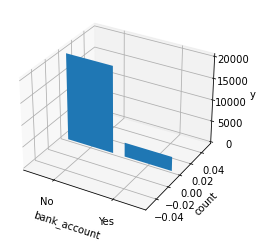

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
counts = data_set_train['bank_account'].value_counts()
ax.bar(counts.index, counts.values, zs=0, zdir='y')
ax.set_xlabel('bank_account')
ax.set_ylabel('count')
ax.set_zlabel('y')
plt.show()

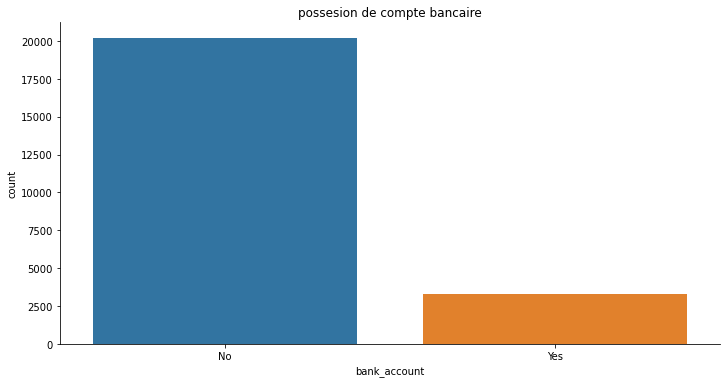

In [24]:



counts = data_set_train['bank_account'].value_counts()


sns.catplot(x="bank_account", kind="count", data=data_set_train, height=5, aspect=2)
plt.title('possesion de compte bancaire')
plt.show()


In [25]:
le = LabelEncoder()
data_set_train['bank_account'] = le.fit_transform(data_set_train['bank_account'])


X_train = data_set_train.drop(['bank_account'], axis=1)
y_train = data_set_train['bank_account']


In [26]:
def preprocessing_data(data):

    
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    data = data.drop(["uniqueid"], axis=1)
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [27]:
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test_set)



In [11]:
print(processed_train[:1])

[[1.        0.        0.        0.        0.4047619 0.        0.
  1.        0.        0.        0.        0.        0.        0.
  0.        1.        0.        1.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  1.        0.        0.        0.        0.        1.        0.
  0.        0.       ]]


In [28]:
print(processed_train.shape)

(23524, 37)


In [29]:
data_set_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Tanzania,2017,uniqueid_3449,0,Urban,Yes,2,29,Male,Head of Household,Single/Never Married,Primary education,Self employed
1,Rwanda,2016,uniqueid_3465,0,Rural,Yes,4,21,Female,Child,Single/Never Married,Primary education,Farming and Fishing
2,Tanzania,2017,uniqueid_5511,0,Urban,No,6,55,Male,Head of Household,Single/Never Married,Primary education,Self employed
3,Tanzania,2017,uniqueid_5444,0,Urban,Yes,3,38,Male,Head of Household,Single/Never Married,Primary education,Self employed
4,Rwanda,2016,uniqueid_2666,0,Urban,Yes,4,40,Male,Head of Household,Married/Living together,Primary education,Informally employed


In [30]:
X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [46]:
model = DecisionTreeClassifier()

model.fit(X_Train,y_Train)

DecisionTreeClassifier()

In [41]:

prediction_on_training_data = model.predict(X_Val)
accuracy_on_training_data = accuracy_score(y_val,prediction_on_training_data)

In [42]:
print(accuracy_on_training_data)

0.832979175520612


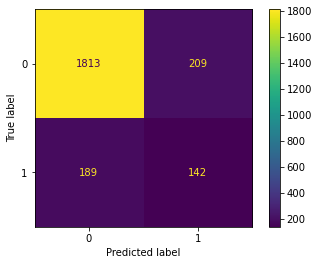

In [48]:
plot_confusion_matrix(model,X_Val, y_val)
plt.show()

In [50]:
test_set.bank_account = model.predict(processed_test)

<ipython-input-50-8d5b412181d0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_set.bank_account = model.predict(processed_test)


In [55]:
submission = pd.DataFrame({"uniqueid": test_set["uniqueid"] + " x " + test_set["country"],
                           "bank_account": test_set.bank_account})

In [56]:
submission.sample(5)

,uniqueid,bank_account
1426,uniqueid_7495 x Kenya,1
3368,uniqueid_9503 x Rwanda,0
4288,uniqueid_10423 x Rwanda,0
8686,uniqueid_8961 x Tanzania,0
2407,uniqueid_8476 x Kenya,0


In [57]:
submission.to_csv('first_submission.csv', index = False)


In [ ]:
  print(f"Unique ID: {uniqueid}, Country: {country}, Bank account: {bank_account}")